In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('precision',3)
pd.options.display.max_columns = 999
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

<h2>Вспомним предыдущую лекцию</h2>

In [111]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [4]:
features = ['Age', 'Pclass'] 

In [5]:
y = train.Survived
X = train[features]

In [6]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [8]:
X

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [9]:
for col in train.columns: 
    print (col, ' - any missing ? - ', train[col].isnull().any())

PassengerId  - any missing ? -  False
Survived  - any missing ? -  False
Pclass  - any missing ? -  False
Name  - any missing ? -  False
Sex  - any missing ? -  False
Age  - any missing ? -  True
SibSp  - any missing ? -  False
Parch  - any missing ? -  False
Ticket  - any missing ? -  False
Fare  - any missing ? -  False
Cabin  - any missing ? -  True
Embarked  - any missing ? -  True


In [10]:
X_filled = X.fillna(X.median())
X_test_init = test[features].fillna(test[features].median())

In [12]:
clf = LogisticRegression(random_state=0).fit(X_filled, y)
probas = clf.predict_proba(X_test_init)

In [13]:
probas

array([[ 0.801,  0.199],
       [ 0.857,  0.143],
       [ 0.783,  0.217],
       [ 0.760,  0.240],
       [ 0.729,  0.271],
       [ 0.675,  0.325],
       [ 0.777,  0.223],
       [ 0.531,  0.469],
       [ 0.703,  0.297],
       [ 0.723,  0.277],
       [ 0.760,  0.240],
       [ 0.444,  0.556],
       [ 0.276,  0.724],
       [ 0.788,  0.212],
       [ 0.452,  0.548],
       [ 0.515,  0.485],
       [ 0.602,  0.398],
       [ 0.723,  0.277],
       [ 0.760,  0.240],
       [ 0.849,  0.151],
       [ 0.516,  0.484],
       [ 0.639,  0.361],
       [ 0.303,  0.697],
       [ 0.263,  0.737],
       [ 0.460,  0.540],
       [ 0.869,  0.131],
       [ 0.270,  0.730],
       [ 0.732,  0.268],
       [ 0.405,  0.595],
       [ 0.760,  0.240],
       [ 0.710,  0.290],
       [ 0.515,  0.485],
       [ 0.793,  0.207],
       [ 0.760,  0.240],
       [ 0.323,  0.677],
       [ 0.706,  0.294],
       [ 0.760,  0.240],
       [ 0.723,  0.277],
       [ 0.748,  0.252],
       [ 0.760,  0.240],


In [14]:
clf.classes_

array([0, 1], dtype=int64)

<h2>Метрика оценки качества модели. Accuracy, precision и recall</h2>

В задачах машинного обучения для оценки качества моделей и сравнения различных алгоритмов используются метрики, а их выбор и анализ — непременная часть работы датасатаниста.


Далее мы рассмотрим некоторые критерии качества в задачах классификации, обсудим, что является важным при выборе метрики и что может пойти не так.

**Confusion matrix**

Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок).
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

<img src='cf.png'>

In [18]:
y_pred = clf.predict(X_filled)

Confusion matrix, without normalization
[[476  73]
 [190 152]]
Normalized confusion matrix
[[0.87 0.13]
 [0.56 0.44]]


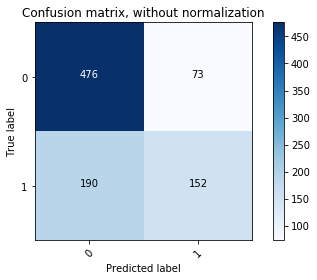

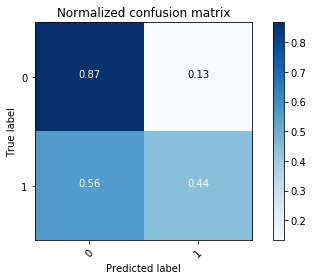

In [21]:
import itertools

class_names = clf.classes_

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Accuracy**

<img src='accuracy.png'>

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [29]:
accuracy_score(train['Survived'], y_pred)

0.7048260381593715

<img src='table.png'>

In [30]:
precision_score(train['Survived'], y_pred)

0.6755555555555556

In [31]:
recall_score(train['Survived'], y_pred)

0.4444444444444444

In [46]:
clf = LogisticRegression(random_state=0).fit(X_filled, train['Survived'])
probs = clf.predict_proba(X_filled)[:, 1:2]

In [47]:
probs_df = pd.DataFrame(probs, columns=['pred_class_1'])

In [48]:
probs_df['class'] = train['Survived'].values

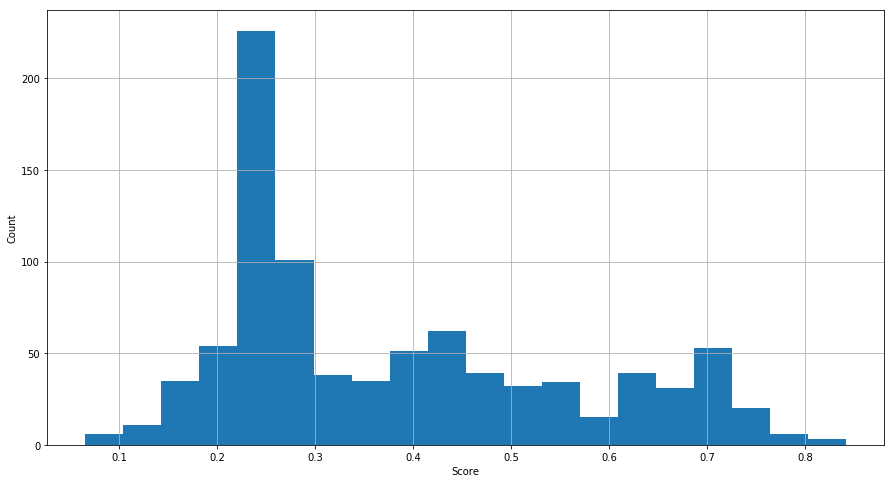

In [49]:
plt.figure(figsize=(15,8))

probs_df['pred_class_1'].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('Score')
plt.show()

In [50]:
predict = clf.predict(X_filled)

In [68]:
y_pred = []
value = 0.5
for item in probs:
    if item[0] >= value:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
accuracy_score(train['Survived'], predict) - accuracy_score(train['Survived'], y_pred)

0.0

In [61]:
precision_score(train['Survived'], predict) - precision_score(train['Survived'], y_pred)

0.0

In [62]:
recall_score(train['Survived'], predict) - recall_score(train['Survived'], y_pred)

0.0

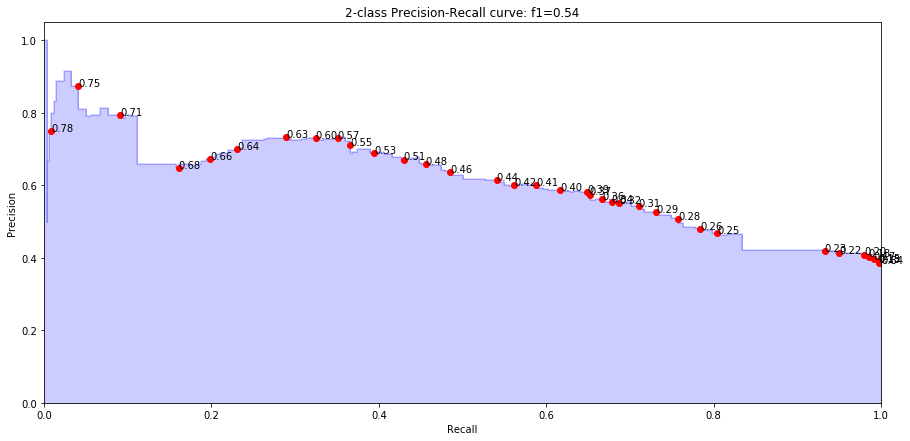

In [69]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import f1_score

plt.figure(figsize=(15,7))
probs = clf.predict_proba(X_filled)[:, 1:2]

f1 = f1_score(train['Survived'], y_pred)

precision, recall, th = precision_recall_curve(train['Survived'], probs)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: f1={0:0.2f}'.format(
          f1))

for i, (x, y) in enumerate(zip(recall, precision)):
    if i%5!=0:continue
    plt.plot((x,), (y,), 'ro')
    plt.text(x, y, '%0.2f' % (th[i-1])) #'{: 0.3f}'

<h2>Валидация на отложенной выборке. Кроссвалидация</h2>

Мы сделали предсказание с помощью модели, ура! 

Что же мы предсказали и как с этим разобраться?

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filled, train['Survived'], test_size=0.33, random_state=42)

<img src = "http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png">

In [80]:
clf = LogisticRegression().fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.7389830508474576

In [37]:
predict = clf.predict(X_test_init)
test['Survived'] = predict

In [38]:
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('predict.csv')

<img src='score.jpg'>

In [39]:
C_range = np.linspace(0.1, 5, num=100)

scores = []
for C in C_range:
    clf = LogisticRegression(random_state=0, C=C).fit(X_train, y_train)
    predict = clf.predict(X_test)
    scores.append(accuracy_score(y_test, predict))

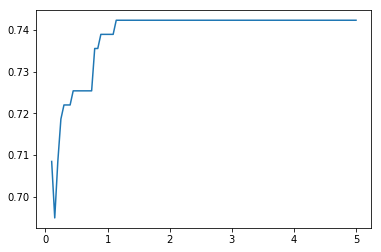

In [40]:
plt.plot(C_range, scores)
plt.show()

In [44]:
clf = LogisticRegression(random_state=0, C=2).fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.7423728813559322

In [45]:
clf = LogisticRegression(random_state=0, C=2).fit(X_train, y_train)
predict = clf.predict(X_test_init)
test['Survived'] = predict
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('predict1.csv')

<img src='score2.jpg'>

**Что произойдет, если обучаться на полном датасете?**

Возможно переобучение

In [102]:
from sklearn.model_selection import StratifiedKFold

<img src='http://brettromero.com/wp-content/uploads/2016/05/cross-validation-1024x561.png'>

In [105]:
y = train.Survived

In [106]:
skf = StratifiedKFold(n_splits=3)

X_train_list = []
y_train_list = []

X_test_list = []
y_test_list = []

for train_index, test_index in skf.split(X_filled, y):
    X_train_list.append(X_filled.iloc[train_index])
    X_test_list.append(X_filled.iloc[test_index])
    y_train_list.append(y.iloc[train_index])
    y_test_list.append(y.iloc[test_index])

In [107]:
C_range = np.linspace(0.1, 5, num=100)

predict1 = []
predict2 = []
predict3 = []
predict_mean = []
for x in C_range:
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[0], y_train_list[0])
    predict = clf.predict(X_test)
    predict1.append(accuracy_score(y_test, predict))
    
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[1], y_train_list[1])
    predict = clf.predict(X_test)
    predict2.append(accuracy_score(y_test, predict))
    
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[2], y_train_list[2])
    predict = clf.predict(X_test)
    predict3.append(accuracy_score(y_test, predict))
    
    
predict_mean = []
for x in range(100):
    predict_mean.append((predict1[x] + predict2[x] + predict3[x])/3)

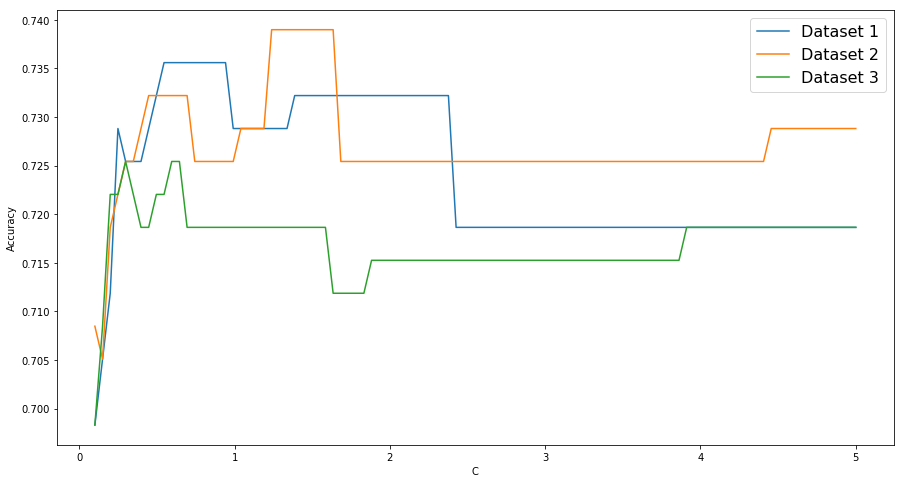

In [109]:
plt.figure(figsize=(15,8))
plt.plot(C_range, predict1, label='Dataset 1')
plt.plot(C_range, predict2, label='Dataset 2')
plt.plot(C_range, predict3, label='Dataset 3')
plt.legend(prop={'size': 16})
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

<img src='https://hsto.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png'>

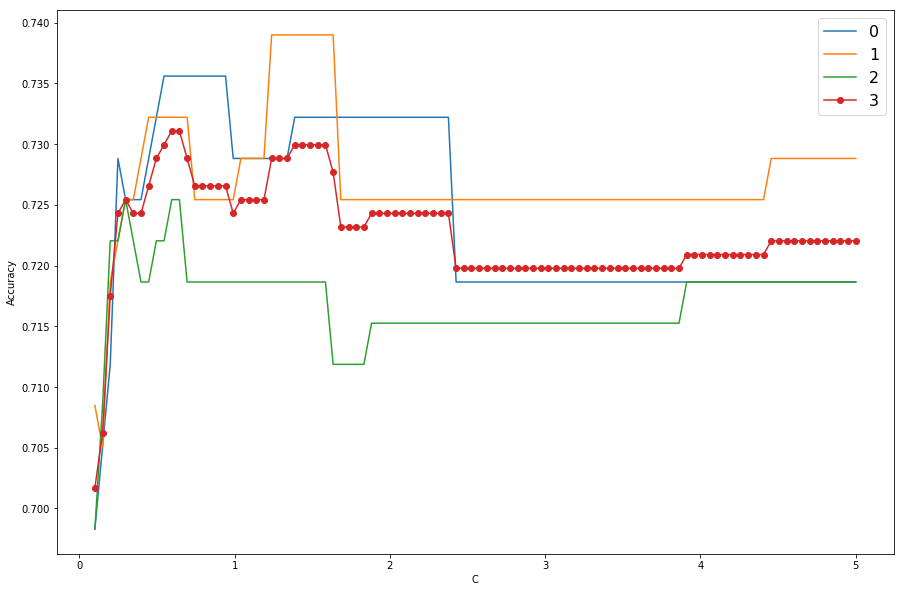

In [434]:
plt.figure(figsize=(15,10))
plt.plot(C_range, predict1, label='0')
plt.plot(C_range, predict2, label='1')
plt.plot(C_range, predict3, label='2')
plt.plot(C_range, predict_mean, label='3', marker='o')
plt.legend(prop={'size': 16})
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

<h2>Работа с категориальными переменными. LabelEncoding, OneHotEncoding</h2>

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [85]:
features = ['Age', 'Pclass', 'Sex'] 
y = train.Survived
X = train[features]
X_filled = X.fillna(X.median())

In [86]:
clf = LogisticRegression().fit(X_filled, y)

ValueError: could not convert string to float: 'male'

**LabelEncoding**

<img src='labelencoding.png'>

In [88]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['Sex'] = enc.fit_transform(train['Sex'])

In [89]:
y = train.Survived
X_filled = train[features].fillna(X.median())

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

In [91]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [92]:
predict = clf.predict(X_test)

In [93]:
accuracy_score(y_test, predict)

0.8

In [96]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

X_train_list = []
y_train_list = []

X_test_list = []
y_test_list = []

for train_index, test_index in skf.split(X_filled, y):
    X_train_list.append(X_filled.iloc[train_index])
    X_test_list.append(X_filled.iloc[test_index])
    y_train_list.append(y.iloc[train_index])
    y_test_list.append(y.iloc[test_index])

In [97]:
C_range = np.linspace(0.1, 5, num=100)

predict1 = []
predict2 = []
predict3 = []
predict_mean = []
for x in C_range:
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[0], y_train_list[0])
    predict = clf.predict(X_test)
    predict1.append(accuracy_score(y_test, predict))
    
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[1], y_train_list[1])
    predict = clf.predict(X_test)
    predict2.append(accuracy_score(y_test, predict))
    
    clf = LogisticRegression(random_state=0, C=x).fit(X_train_list[2], y_train_list[2])
    predict = clf.predict(X_test)
    predict3.append(accuracy_score(y_test, predict))
    
    
predict_mean = []
for x in range(100):
    predict_mean.append((predict1[x] + predict2[x] + predict3[x])/3)

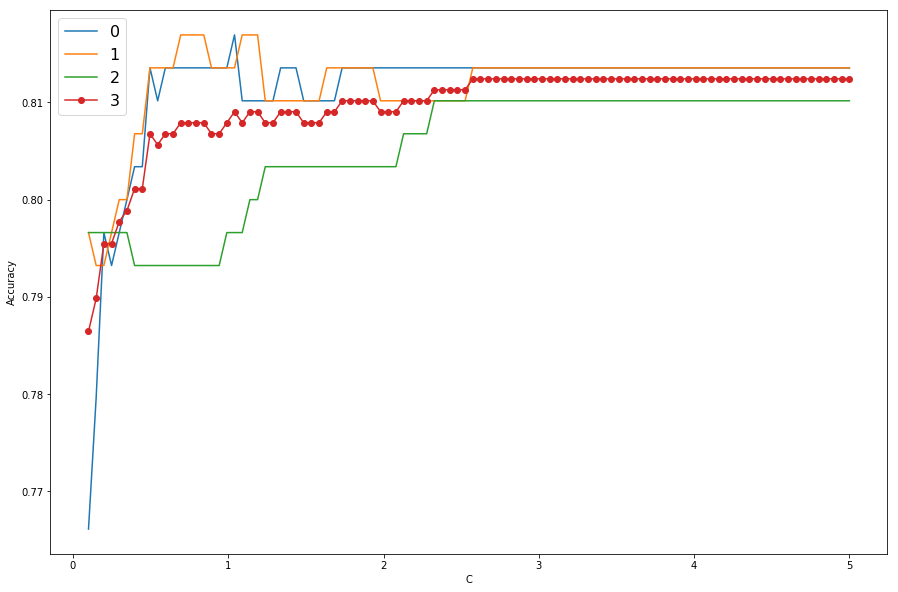

In [106]:
plt.figure(figsize=(15,10))
plt.plot(C_range, predict1, label='0')
plt.plot(C_range, predict2, label='1')
plt.plot(C_range, predict3, label='2')
plt.plot(C_range, predict_mean, label='3', marker='o')
plt.legend(prop={'size': 16})
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

**OneHotEncoding**

<img src='onehotencoding.png'>

In [109]:
from sklearn.preprocessing import OneHotEncoder
enc = LabelEncoder()
train['Sex'] = enc.fit_transform(train['Sex'])

In [110]:
y = train.Survived
X_filled = train[features].fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predict = clf.predict(X_test)

accuracy_score(y_test, predict)

0.8

In [101]:
enc = LabelEncoder()
train['Sex'] = enc.fit_transform(train['Sex'])